In [19]:
 import pandas as pd
 df=pd.read_csv('/Transactions.csv')
 df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df.shape

(284807, 31)

In [21]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [23]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop('Class', axis=1)
y=df['Class']

In [26]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape, x_test.shape

((227845, 30), (56962, 30))

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

x_train_res.shape,y_train_res.value_counts()

((454902, 30),
 Class
 0    227451
 1    227451
 Name: count, dtype: int64)

Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [30]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_res,y_train_res)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [31]:
y_pred_log = log_model.predict(x_test)
y_pred_log_proba = log_model.predict_proba(x_test)[:,1]

print("Confusion Matrix. ")
print(confusion_matrix(y_test,y_pred_log))

print("\nClassification Report.")
print(classification_report(y_test,y_pred_log))

print("\nAUC-ROC Score. ")
print(roc_auc_score(y_test,y_pred_log_proba))


Confusion Matrix. 
[[56213   651]
 [   10    88]]

Classification Report.
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.90      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962


AUC-ROC Score. 
0.9759745414766919


Random Forest Model

In [32]:
import pandas as pd


In [33]:
import numpy as np


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv('/Transactions.csv')

In [39]:
x = df.drop('Class', axis=1)
y = df['Class']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [41]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [43]:
y_pred = rf_model.predict(x_test)
y_proba = rf_model.predict_proba(x_test)[:, 1]

print("\nCONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)



CONFUSION MATRIX:
[[56846    18]
 [   17    81]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9802755303021601


In [44]:
importances = rf_model.feature_importances_
features = x.columns

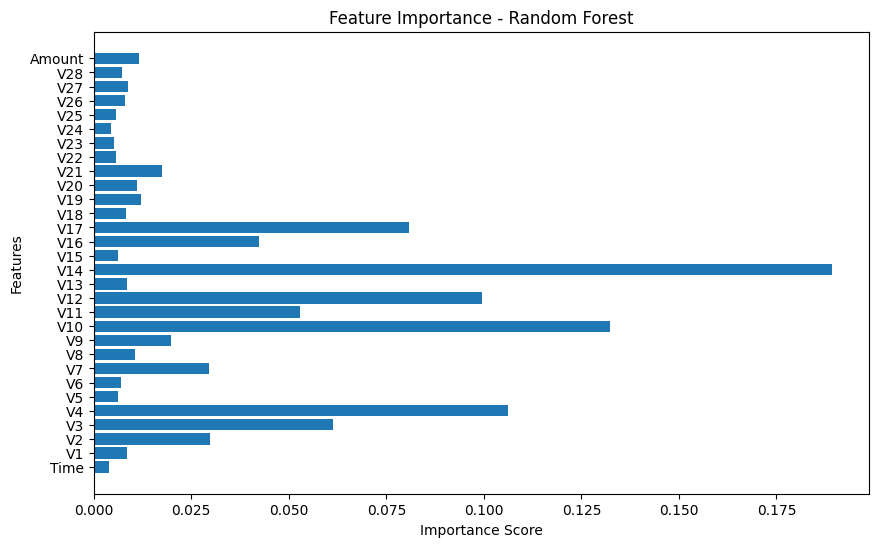

In [45]:
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [46]:
df['Pred_LR'] = log_model.predict(x)
df['Proba_LR'] = log_model.predict_proba(x)[:,1]

In [48]:
df['Pred_RF'] = rf_model.predict(x)
df['Proba_RF'] = rf_model.predict_proba(x)[:,1]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [50]:
df['HOUR']= (df['Time']//3600).astype(int)
df['DAY']= (df['Time']//(3600*24)).astype(int)
df['MONTH']= (df['DAY']//30).astype(int)


In [51]:
df['High_value'] = (df['Amount']> 200).astype(int)

In [52]:
df['Custom_spend'] = df['Amount']* (df['V1'].abs() +1)

In [53]:
df.to_csv('Transactions_final.csv', index=False)

In [58]:
import os
os.getcwd()

'/content'